In [1]:
import requests
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import zscore
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
df = pd.read_csv('wine_df_dummies.csv')

In [4]:
df.head(0)

,Unnamed: 0,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2


In [8]:
df.drop(columns = 'Unnamed: 0', inplace = True)

In [9]:
df.head(0)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2


In [67]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [68]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(x=indie_vars, y=dep_var, palette=["m", "g"],
            data=df)
#sns.despine(offset=10, trim=True)

ValueError: could not broadcast input array from shape (6497,10) into shape (6497)

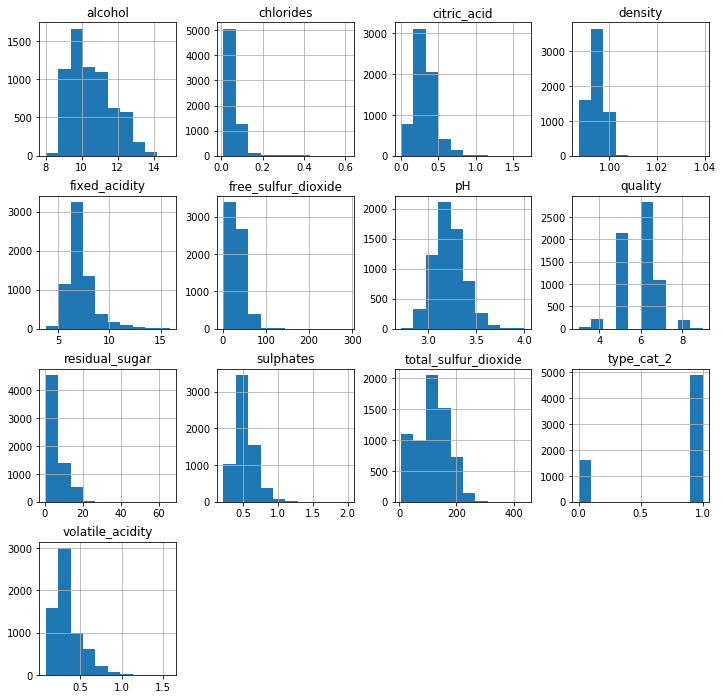

In [22]:
df.hist(figsize = (12,12))
plt.show()

## Intial Fit Test

In [14]:
df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


In [15]:
p = list(df.columns)

In [16]:
p

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type_cat_2']

In [17]:
p = ['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type_cat_2']
target = 'quality'

In [18]:
train, test = train_test_split(df)

In [19]:
predictors = '+'.join(p)
f = target + '~' + predictors
model = ols(formula=f, data=test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     56.12
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          4.11e-113
Time:                        11:49:14   Log-Likelihood:                -1821.2
No. Observations:                1625   AIC:                             3668.
Df Residuals:                    1612   BIC:                             3739.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               91.3914     23.768      3.845      0.000      44.771     138.012
fixed_acidity            0.0645      0.030      2.123      0.034       0.005       0.124
volatile_acidity        -1.5210      0.162     -9.361      0.000      -1.840      -1.202
citric_acid             -0.1709      0.166     -1.028      0.304      -0.497       0.155
residual_sugar           0.0514      0.011      4.668      0.000       0.030       0.073
chlorides               -1.3583      0.615     -2.210      0.027      -2.564      -0.153
free_sulfur_dioxide      0.0038      0.002      2.376      0.018       0.001       0.007
total_sulfur_dioxide    -0.0010      0.001     -1.571      0.116      -0.002       0.000
density                -89.4954     24.161     -3.704      0.000    -136.885     -42.105
pH                       0.2255      0.175      1.292      0.197      -0.117       0.568
sulphates                0.7827      0.162      4.839      0.000       0.465       1.100
alcohol                  0.2359      0.031      7.578      0.000       0.175       0.297
type_cat_2              -0.3515      0.112     -3.141      0.002      -0.571      -0.132
==============================================================================
Omnibus:                       31.675   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.954
Skew:                           0.126   Prob(JB):                     7.08e-13
Kurtosis:                       3.874   Cond. No.                     2.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
def log_transform(full_df):
    """Performs log transformation of a dataframes columns. If columns value is equal to 0, 0.001 will be logged instead."""
    logged = []
    for column in df.columns:
        logged.append(df[f'{column}'].transform(lambda x: np.log(x) if x !=0 else np.log(0.001)))
    logged_df = pd.DataFrame(logged)
    return logged_df.transpose()

In [ ]:
def log_column(df_column):
    """Performs log transformation of a dataframe column. If column value is equal to 0, 0.001 will be logged instead."""
    transformed = df_column.transform(lambda x: np.log(x) if x !=0 else np.log(0.001))
    results = pd.DataFrame(transformed)
    return results

In [24]:
df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


In [29]:
df_to_log = df.drop(columns = ['pH', 'sulphates', 'density', 'type_cat_2', 'quality'])

In [31]:
df_logged = log_transform(df_to_log)

In [33]:
df_logged['pH'] = df['pH'].values

In [35]:
df_logged['sulphates'] = df['sulphates'].values
df_logged['density'] = df['density'].values
df_logged['type_cat_2'] = df['type_cat_2'].values
df_logged['quality'] = df['quality'].values

In [36]:
df_logged

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
0,2.001480,-0.356675,-6.907755,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,0.56,2.240710,5,0
1,2.054124,-0.127833,-6.907755,0.955511,-2.322788,3.218876,4.204693,0.99680,3.20,0.68,2.282382,5,0
2,2.054124,-0.274437,-3.218876,0.832909,-2.385967,2.708050,3.988984,0.99700,3.26,0.65,2.282382,5,0
3,2.415914,-1.272966,-0.579818,0.641854,-2.590267,2.833213,4.094345,0.99800,3.16,0.58,2.282382,6,0
4,2.001480,-0.356675,-6.907755,0.641854,-2.577022,2.397895,3.526361,0.99780,3.51,0.56,2.240710,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.824549,-1.560648,-1.237874,0.470004,-3.244194,3.178054,4.521789,0.99114,3.27,0.50,2.415914,6,1
6493,1.887070,-1.139434,-1.021651,2.079442,-3.057608,4.043051,5.123964,0.99490,3.15,0.46,2.261763,5,1
6494,1.871802,-1.427116,-1.660731,0.182322,-3.194183,3.401197,4.709530,0.99254,2.99,0.46,2.240710,6,1
6495,1.704748,-1.237874,-1.203973,0.095310,-3.816713,2.995732,4.700480,0.98869,3.34,0.38,2.549445,7,1


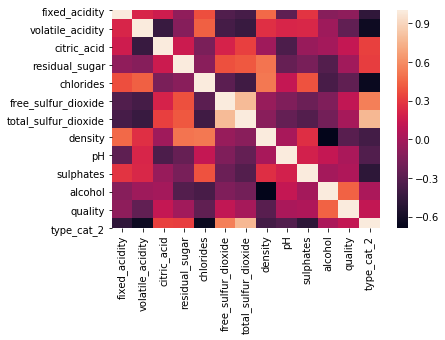

In [38]:
sns.heatmap(df_logged.corr())

In [39]:
df_logged.drop(columns = 'total_sulfur_dioxide', inplace = True)

In [40]:
df_logged

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type_cat_2
0,2.001480,-0.356675,-6.907755,0.641854,-2.577022,2.397895,0.99780,3.51,0.56,2.240710,5,0
1,2.054124,-0.127833,-6.907755,0.955511,-2.322788,3.218876,0.99680,3.20,0.68,2.282382,5,0
2,2.054124,-0.274437,-3.218876,0.832909,-2.385967,2.708050,0.99700,3.26,0.65,2.282382,5,0
3,2.415914,-1.272966,-0.579818,0.641854,-2.590267,2.833213,0.99800,3.16,0.58,2.282382,6,0
4,2.001480,-0.356675,-6.907755,0.641854,-2.577022,2.397895,0.99780,3.51,0.56,2.240710,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1.824549,-1.560648,-1.237874,0.470004,-3.244194,3.178054,0.99114,3.27,0.50,2.415914,6,1
6493,1.887070,-1.139434,-1.021651,2.079442,-3.057608,4.043051,0.99490,3.15,0.46,2.261763,5,1
6494,1.871802,-1.427116,-1.660731,0.182322,-3.194183,3.401197,0.99254,2.99,0.46,2.240710,6,1
6495,1.704748,-1.237874,-1.203973,0.095310,-3.816713,2.995732,0.98869,3.34,0.38,2.549445,7,1


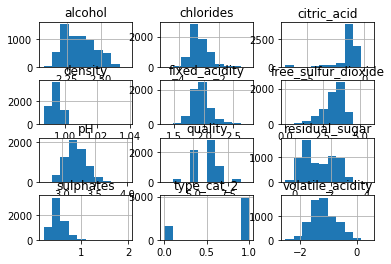

In [43]:
df_logged.hist()
plt.show()

In [45]:
print(list(df_logged.columns))

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type_cat_2']


In [46]:
p = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
     'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type_cat_2']

In [47]:
train, test = train_test_split(df_logged)

In [48]:
predictors = '+'.join(p)
f = target + '~' + predictors
model = ols(formula=f, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     189.0
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:23:23   Log-Likelihood:                -5432.9
No. Observations:                4872   AIC:                         1.089e+04
Df Residuals:                    4860   BIC:                         1.097e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              72.3349     14.103      5.129      0.000      44.686      99.983
fixed_acidity           0.3608      0.126      2.866      0.004       0.114       0.608
volatile_acidity       -0.5779      0.033    -17.312      0.000      -0.643      -0.512
citric_acid             0.0118      0.012      0.957      0.339      -0.012       0.036
residual_sugar          0.2617      0.029      9.057      0.000       0.205       0.318
chlorides              -0.1174      0.038     -3.129      0.002      -0.191      -0.044
free_sulfur_dioxide     0.1545      0.019      8.012      0.000       0.117       0.192
density               -76.5550     14.081     -5.437      0.000    -104.160     -48.950
pH                      0.2358      0.098      2.416      0.016       0.044       0.427
sulphates               0.6663      0.087      7.701      0.000       0.497       0.836
alcohol                 2.7161      0.218     12.469      0.000       2.289       3.143
type_cat_2             -0.5461      0.056     -9.799      0.000      -0.655      -0.437
==============================================================================
Omnibus:                      102.124   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.998
Skew:                           0.075   Prob(JB):                     5.60e-47
Kurtosis:                       4.013   Cond. No.                     1.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

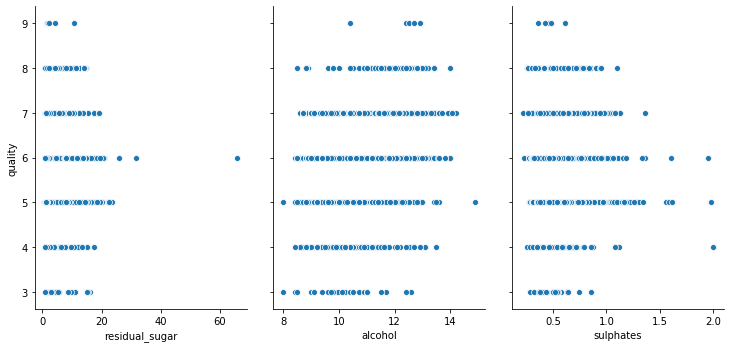

In [52]:
sns.pairplot(df, x_vars=['residual_sugar','alcohol','sulphates'], y_vars='quality', size=5, aspect=0.7)

In [ ]:
for col in df_logged:
    df[f'{col}']

In [60]:
indie_vars = df_logged[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
     'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

In [65]:
indie_vars = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
     'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
dep_var = 'quality'

In [66]:
# sns.set(style="ticks", palette="pastel")

# sns.boxplot(x=indie_vars, y=dep_var, palette=["m", "g"],
#             data=df_logged)
# #sns.despine(offset=10, trim=True)

ValueError: could not broadcast input array from shape (6497,10) into shape (6497)